In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [96]:
Df = pd.read_csv(r'C:\Users\USER\Downloads\Airbnb_NYC_2019.csv')


In [97]:
M= Df.loc[['Manhattan' in neighbourhood_group for neighbourhood_group in Df['neighbourhood_group']],: ]
M

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


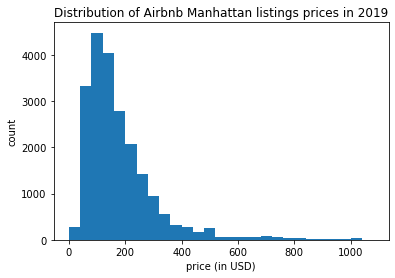

In [98]:
plt.hist(M["price"],bins= np.arange(0, 1100, 40))
plt.title('Distribution of Airbnb Manhattan listings prices in 2019')
plt.xlabel('price (in USD)')
plt.ylabel('count')
plt.show()

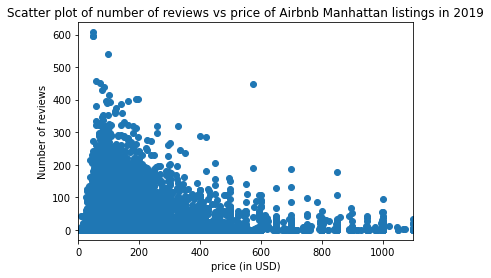

In [99]:
plt.scatter(x= M["price"], y= M["number_of_reviews"])
plt.xlim(0, 1100)
plt.title("Scatter plot of number of reviews vs price of Airbnb Manhattan listings in 2019")
plt.xlabel("price (in USD)")
plt.ylabel("Number of reviews")
plt.show()

In [100]:
top_10= M.groupby('neighbourhood')['neighbourhood'].count().nlargest(10)
top_10

neighbourhood
Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [107]:
Manhattan10= pd.merge(M, top_10, left_on= 'neighbourhood', right_index= True)
Manhattan10

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,neighbourhood_x,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_y
1,Midtown,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1545
232,Midtown,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.78,1,0,1545
245,Midtown,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,1545
373,Midtown,110739,"Very Central, Nomad/Chelsea Loft Studio",568568,Driss,Manhattan,Midtown,40.74503,-73.98876,Entire home/apt,169,18,54,2019-07-03,0.57,1,98,1545
382,Midtown,114969,"Manhattan Studio, Perfect Location",582598,Andrey,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,2018-09-24,0.40,1,0,1545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48520,Washington Heights,36307890,BEAUTIFUL BEDROOM IN NICE AREA UPTOWN NYC!,139296591,David,Manhattan,Washington Heights,40.83851,-73.94579,Private room,120,3,0,NaN,NaN,1,344,899
48579,Washington Heights,36318764,"Modern, Artistic, Cheap & Chic",21357175,Tomy,Manhattan,Washington Heights,40.84150,-73.93661,Entire home/apt,107,4,0,NaN,NaN,1,9,899
48659,Washington Heights,36368048,"Luxury appartment, special edition for musicians.",253681134,Azamat,Manhattan,Washington Heights,40.83423,-73.94723,Private room,74,3,0,NaN,NaN,1,3,899
48738,Washington Heights,36413327,CHEAP AND COZY ROOM JUST 20 MIN AWAY FROM TIME...,255476470,Maria,Manhattan,Washington Heights,40.83331,-73.94547,Private room,50,5,0,NaN,NaN,1,51,899


In [108]:
print(Manhattan10.shape[0])

15823


In [109]:
print(Manhattan10.shape[1])

18


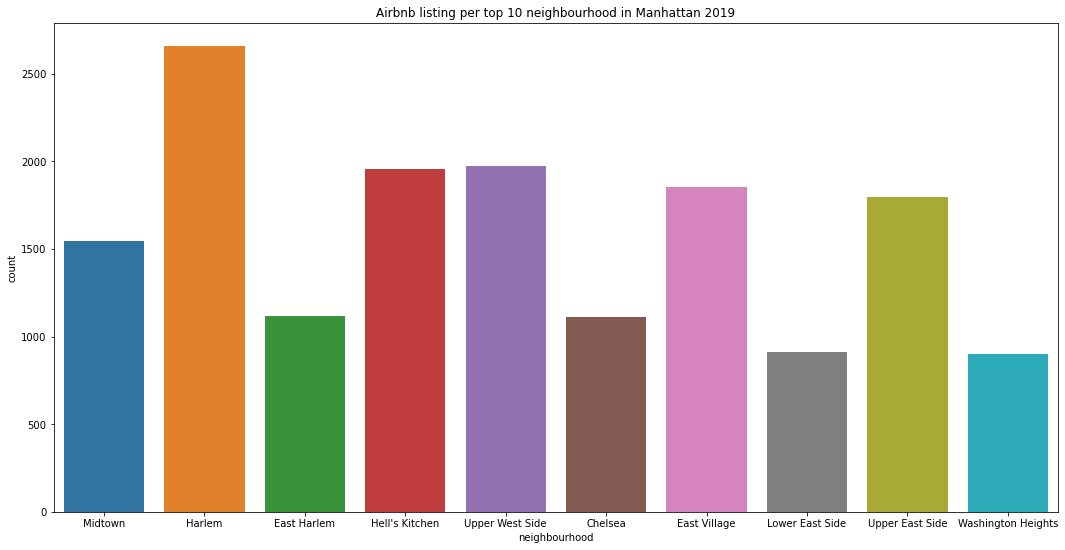

In [112]:
plt.figure(figsize=(18, 9))
sn.countplot(x= 'neighbourhood', data= Manhattan10)
plt.title('Airbnb listing per top 10 neighbourhood in Manhattan 2019')
plt.show()